**Name**: Banoj Kumar Jena  
**Course**: MSCS 634 - Machine Learning  
**Lab**: Lab 2 - Classification Using KNN and RNN Algorithms  


# Step 1: Load and Prepare the Dataset

In [1]:
# Import required libraries
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier

# Load dataset
wine = load_wine()
X = wine.data
y = wine.target

# Basic data exploration
print("Feature names:", wine.feature_names)
print("Target classes:", wine.target_names)
print("Class distribution:", np.bincount(y))

# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Standardize features (important for distance-based classifiers)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Feature names: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']
Target classes: ['class_0' 'class_1' 'class_2']
Class distribution: [59 71 48]


# Step 2: Implement K-Nearest Neighbors (KNN)

In [2]:
# Try different k values
k_values = [1, 5, 11, 15, 21]
knn_accuracies = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    knn_accuracies.append(acc)
    print(f"K={k} -> Accuracy: {acc:.4f}")


K=1 -> Accuracy: 0.9722
K=5 -> Accuracy: 0.9722
K=11 -> Accuracy: 1.0000
K=15 -> Accuracy: 1.0000
K=21 -> Accuracy: 1.0000


# Step 3: Implement Radius Neighbors (RNN)


In [3]:
# Try different radius values
radii = [350, 400, 450, 500, 550, 600]
rnn_accuracies = []

for radius in radii:
    rnn = RadiusNeighborsClassifier(radius=radius, outlier_label=-1)
    rnn.fit(X_train_scaled, y_train)
    y_pred = rnn.predict(X_test_scaled)
    # Filter out outlier predictions (-1)
    valid_idx = y_pred != -1
    acc = accuracy_score(y_test[valid_idx], y_pred[valid_idx]) if np.any(valid_idx) else 0
    rnn_accuracies.append(acc)
    print(f"Radius={radius} -> Accuracy: {acc:.4f}")


Radius=350 -> Accuracy: 0.3889
Radius=400 -> Accuracy: 0.3889
Radius=450 -> Accuracy: 0.3889
Radius=500 -> Accuracy: 0.3889
Radius=550 -> Accuracy: 0.3889
Radius=600 -> Accuracy: 0.3889


# Step 4: Visualize and Compare Results

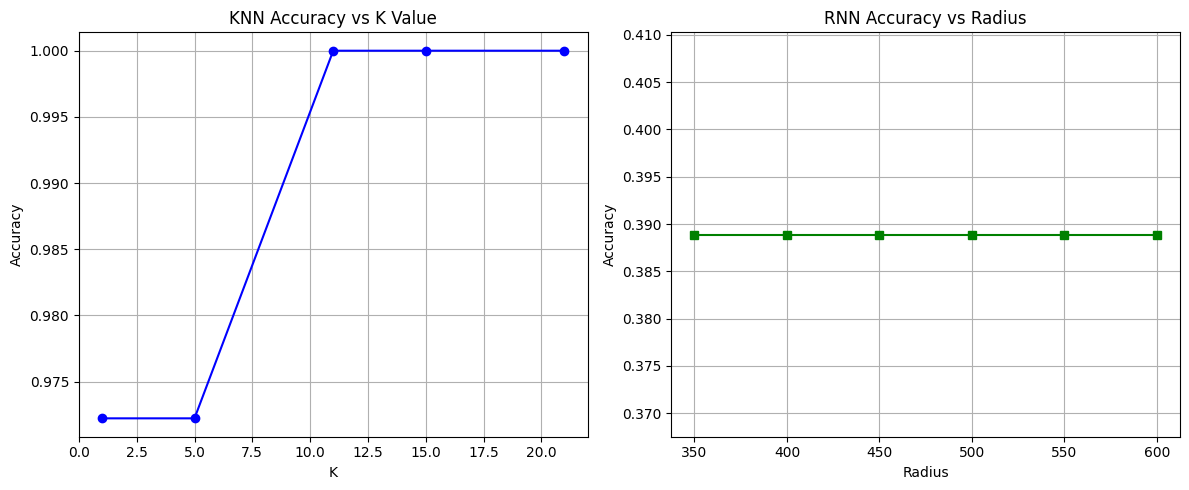

In [4]:
# Plot accuracy trends
plt.figure(figsize=(12, 5))

# KNN plot
plt.subplot(1, 2, 1)
plt.plot(k_values, knn_accuracies, marker='o', color='blue')
plt.title('KNN Accuracy vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.grid(True)

# RNN plot
plt.subplot(1, 2, 2)
plt.plot(radii, rnn_accuracies, marker='s', color='green')
plt.title('RNN Accuracy vs Radius')
plt.xlabel('Radius')
plt.ylabel('Accuracy')
plt.grid(True)

plt.tight_layout()
plt.show()
